In [1]:
# 경고 메시지가 나오지 않도록 warnings 모듈을 사용합니다.
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# 아나콘다의 경우 아래와 같이 코딩합니다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# 컴퓨터에 있는 맑은 고딕 폰트를 사용합니다.
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [3]:
# cp949 방식으로 읽어야 합니다.
df = pd.read_csv('17.data.csv', encoding='cp949')
df.head()

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,2023-12,(주)니프코코리아,211814,1,31409,충청남도 아산시 둔포면,충청남도 아산시 둔포면 아산밸리남로,4420036032,4420036032,44,...,1,252901,포장용 플라스틱 성형용기 제조업,1988-01-01,NaN,NaN,586,301703340,1,0
1,2023-12,신일기업(주),201810,1,04537,서울특별시 중구 충무로2가,서울특별시 중구 퇴계로,1114012500,1114055000,11,...,1,381002,NaN,1988-01-01,NaN,NaN,19,6727780,1,0
2,2023-12,디에스디엘(주),104811,1,04526,서울특별시 중구 남대문로4가,서울특별시 중구 세종대로,1114011700,1114054000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,16,5194300,0,0
3,2023-12,(주)헤럴드,104810,1,04336,서울특별시 용산구 후암동,서울특별시 용산구 후암로4길,1117010100,1117051000,11,...,1,221200,잡지 및 정기 간행물 발행업,1988-01-01,NaN,NaN,322,130867200,6,8
4,2023-12,연합뉴스(주),102812,1,03143,서울특별시 종로구 수송동,서울특별시 종로구 율곡로2길,1111012400,1111061500,11,...,1,221200,잡지 및 정기 간행물 발행업,1988-01-01,NaN,NaN,825,410437380,3,10


In [4]:
# 컬럼 이름을 확인합니다.
df.columns

Index(['자료생성년월', '사업장명', '사업자등록번호', '사업장가입상태코드 1 등록 2 탈퇴', '우편번호', '사업장지번상세주소',
       '사업장도로명상세주소', '고객법정동주소코드', '고객행정동주소코드', '법정동주소광역시도코드', '법정동주소광역시시군구코드',
       '법정동주소광역시시군구읍면동코드', '사업장형태구분코드 1 법인 2 개인', '사업장업종코드', '사업장업종코드명',
       '적용일자', '재등록일자', '탈퇴일자', '가입자수', '당월고지금액', '신규취득자수', '상실가입자수'],
      dtype='object')

In [5]:
# 필요한 컬럼만 선택합니다.
df = df[['사업장명','사업장업종코드','사업장업종코드명','법정동주소광역시도코드','가입자수','신규취득자수','상실가입자수','당월고지금액']].copy()
df 

,사업장명,사업장업종코드,사업장업종코드명,법정동주소광역시도코드,가입자수,신규취득자수,상실가입자수,당월고지금액
0,(주)니프코코리아,252901,포장용 플라스틱 성형용기 제조업,44,586,1,0,301703340
1,신일기업(주),381002,NaN,11,19,1,0,6727780
2,디에스디엘(주),701201,비주거용 건물 임대업(점포 자기땅),11,16,0,0,5194300
3,(주)헤럴드,221200,잡지 및 정기 간행물 발행업,11,322,6,8,130867200
4,연합뉴스(주),221200,잡지 및 정기 간행물 발행업,11,825,3,10,410437380
...,...,...,...,...,...,...,...,...
536597,유한회사우전-(일용)2023년 상습결빙구간 자동염수분사장치 설치 공사,452104,배관 및 냉ㆍ난방 공사업,29,3,3,0,990000
536598,우주종합건설（주）/일용/당진 현대제철 코크스 CDQ 신설 토건공사(21) 중 건축공사(3,451108,사무ㆍ상업용 및 공공기관용 건물 건설업,44,4,4,1,1557000
536599,(주)제이원기술/일용/아미동 오피스텔 신축공사 중 기계설비공사,452116,소방시설 공사업,26,4,4,0,1377900
536600,유니넷텍(주)-(일용)2023년 구리수택동 수택지역주택조합 재건축 수탁 선로공사(총액),742104,기타 엔지니어링 서비스업,41,4,4,0,1313540


In [7]:
# 컬럼 이름을 사용하기 쉽게 바꿉니다.
column_names = ['사업장명','업종코드','업종코드명','시도코드','가입자수','신규','상실','금액']
df.columns = column_names
df

,사업장명,업종코드,업종코드명,시도코드,가입자수,신규,상실,금액
0,(주)니프코코리아,252901,포장용 플라스틱 성형용기 제조업,44,586,1,0,301703340
1,신일기업(주),381002,NaN,11,19,1,0,6727780
2,디에스디엘(주),701201,비주거용 건물 임대업(점포 자기땅),11,16,0,0,5194300
3,(주)헤럴드,221200,잡지 및 정기 간행물 발행업,11,322,6,8,130867200
4,연합뉴스(주),221200,잡지 및 정기 간행물 발행업,11,825,3,10,410437380
...,...,...,...,...,...,...,...,...
536597,유한회사우전-(일용)2023년 상습결빙구간 자동염수분사장치 설치 공사,452104,배관 및 냉ㆍ난방 공사업,29,3,3,0,990000
536598,우주종합건설（주）/일용/당진 현대제철 코크스 CDQ 신설 토건공사(21) 중 건축공사(3,451108,사무ㆍ상업용 및 공공기관용 건물 건설업,44,4,4,1,1557000
536599,(주)제이원기술/일용/아미동 오피스텔 신축공사 중 기계설비공사,452116,소방시설 공사업,26,4,4,0,1377900
536600,유니넷텍(주)-(일용)2023년 구리수택동 수택지역주택조합 재건축 수탁 선로공사(총액),742104,기타 엔지니어링 서비스업,41,4,4,0,1313540


In [8]:
# 사업자 이름에서 필요한 것을 지우기 위해서 정규식을 사용합니다.
import re

pattern1 = '(\([^)]+\))'
re.sub(pattern1, '', '파이썬회사(주)')

'파이썬회사'

In [12]:
# 정규식 패턴을 정합니다.
pattern1 = '(\([^)]+\))'
pattern2 = '(\[[^)]+\])'
pattern3 = '[^A-Za-z0-9가-힣]'

In [11]:
# 함수를 사용해서 필요없는 글자를 삭제합니다.
def preprocessing(x):
    x = re.sub(pattern1, '', x)
    x = re.sub(pattern2, '', x)
    x = re.sub(pattern3, ' ', x)
    x = re.sub(' +', ' ', x)
    return x

df['사업장명'] = df['사업장명'].apply(preprocessing)
df.head()

,사업장명,업종코드,업종코드명,시도코드,가입자수,신규,상실,금액
0,니프코코리아,252901,포장용 플라스틱 성형용기 제조업,44,586,1,0,301703340
1,신일기업,381002,NaN,11,19,1,0,6727780
2,디에스디엘,701201,비주거용 건물 임대업(점포 자기땅),11,16,0,0,5194300
3,헤럴드,221200,잡지 및 정기 간행물 발행업,11,322,6,8,130867200
4,연합뉴스,221200,잡지 및 정기 간행물 발행업,11,825,3,10,410437380


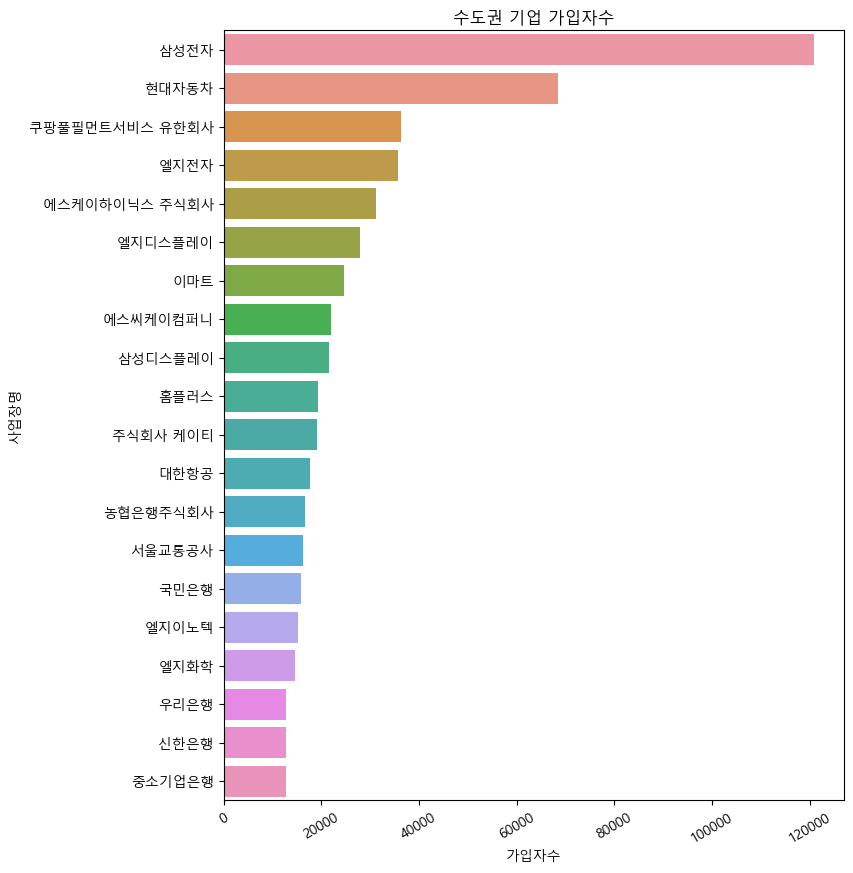

In [13]:
# 수도권 기업 가입자수를 확인해보겠습니다.
# 내림차순으로 20개를 보여줍니다.
# 시도코드가 11~41 사이에 있으면 수도권에 있는 기업입니다.
plt.figure(figsize=(8, 10))
tmp = df.loc[df['시도코드'].isin([11, 41]), ['사업장명', '가입자수']].sort_values('가입자수', ascending=False).head(20).reset_index()
sns.barplot(y='사업장명', x='가입자수', data=tmp)
plt.xticks(rotation=30)
plt.title('수도권 기업 가입자수')
plt.show()

* 국민연금 보험률은 9%입니다. 
    * 급여의 9%를 국민연금으로 냅니다.
* 4.5%는 회사가, 나머지 4.5%는 개인이 부담합니다.
* 이를 거꾸로 계산해서 급여를 계산합니다.
* 국민연금 보험료는 소득 상한선과 하한선이 설정되어 있습니다.
* 하지만 상한선과 하한선이 있어서 실제보다 작게 계산될 수 있습니다.

> * 1인당금액 = 금액 / 가입자수   
> * 월급여 = 1인당금액 / 9 * 100   
> * 연봉  = 월급여 * 12개월

In [14]:
df['1인당금액'] = df['금액'] / df['가입자수']
df['월급여'] =  df['1인당금액'] / 9 * 100
df['연봉'] = df['월급여'] * 12
df.head()

,사업장명,업종코드,업종코드명,시도코드,가입자수,신규,상실,금액,1인당금액,월급여,연봉
0,니프코코리아,252901,포장용 플라스틱 성형용기 제조업,44,586,1,0,301703340,514852.116041,5.720579e+06,6.864695e+07
1,신일기업,381002,NaN,11,19,1,0,6727780,354093.684211,3.934374e+06,4.721249e+07
2,디에스디엘,701201,비주거용 건물 임대업(점포 자기땅),11,16,0,0,5194300,324643.750000,3.607153e+06,4.328583e+07
3,헤럴드,221200,잡지 및 정기 간행물 발행업,11,322,6,8,130867200,406419.875776,4.515776e+06,5.418932e+07
4,연합뉴스,221200,잡지 및 정기 간행물 발행업,11,825,3,10,410437380,497499.854545,5.527776e+06,6.633331e+07


In [15]:
# 결측치를 제거합니다.
df.dropna(axis=0, inplace=True)
df

,사업장명,업종코드,업종코드명,시도코드,가입자수,신규,상실,금액,1인당금액,월급여,연봉
0,니프코코리아,252901,포장용 플라스틱 성형용기 제조업,44,586,1,0,301703340,514852.116041,5.720579e+06,6.864695e+07
2,디에스디엘,701201,비주거용 건물 임대업(점포 자기땅),11,16,0,0,5194300,324643.750000,3.607153e+06,4.328583e+07
3,헤럴드,221200,잡지 및 정기 간행물 발행업,11,322,6,8,130867200,406419.875776,4.515776e+06,5.418932e+07
4,연합뉴스,221200,잡지 및 정기 간행물 발행업,11,825,3,10,410437380,497499.854545,5.527776e+06,6.633331e+07
5,협성해운,612000,내륙 수상 여객 및 화물 운송업,11,35,0,1,13626240,389321.142857,4.325790e+06,5.190949e+07
...,...,...,...,...,...,...,...,...,...,...,...
536597,유한회사우전 2023년 상습결빙구간 자동염수분사장치 설치 공사,452104,배관 및 냉ㆍ난방 공사업,29,3,3,0,990000,330000.000000,3.666667e+06,4.400000e+07
536598,우주종합건설 주 일용 당진 현대제철 코크스 CDQ 신설 토건공사 중 건축공사 3,451108,사무ㆍ상업용 및 공공기관용 건물 건설업,44,4,4,1,1557000,389250.000000,4.325000e+06,5.190000e+07
536599,제이원기술 일용 아미동 오피스텔 신축공사 중 기계설비공사,452116,소방시설 공사업,26,4,4,0,1377900,344475.000000,3.827500e+06,4.593000e+07
536600,유니넷텍 2023년 구리수택동 수택지역주택조합 재건축 수탁 선로공사,742104,기타 엔지니어링 서비스업,41,4,4,0,1313540,328385.000000,3.648722e+06,4.378467e+07


In [16]:
# 회사 정보를 알려주는 함수를 만듭니다.
def find_company(name):
    return df.loc[df['사업장명']==name, ['사업장명','가입자수','연봉']].sort_values('연봉', ascending=False)

In [17]:
find_company('삼성전자')

,사업장명,가입자수,연봉
4286,삼성전자,120877,6.953834e+07


In [18]:
# 파일로 저장합니다.
df.to_csv('17.data_processing.csv')